In [19]:
class MultiLayerNN:
    def __init__(self, hl_nodes = 2, out_nodes = 1, epochs = 10000, learning_rate = 0.01, hl_act_func_name = 'sigmoid', out_act_func_name = 'sigmoid', loss_func_name = 'mse'):
        self.hl_nodes = hl_nodes
        self.out_nodes = out_nodes
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.hl_act_func_name = hl_act_func_name
        self.hl_act_func = self.get_act_func(hl_act_func_name)
        self.out_act_func_name = out_act_func_name
        self.out_act_func = self.get_act_func(out_act_func_name)
        self.loss_func_name = loss_func_name
        self.loss_func = self.get_loss_func(loss_func_name)
        self.hl_weights, self.hl_biases, self.out_weights, self.out_biases = self.gen_w_b(hl_nodes, out_nodes)
        print('Model initiated...')
        print('Number of hidden layer nodes : ', self.hl_nodes)
        print('Number of output layer nodes : ', self.out_nodes)
        print('Epochs : ', self.epochs)
        print('Learning rate : ', self.learning_rate)
        print('Hidden layer activation function : ', self.hl_act_func_name)
        print('Output layer activation function : ', self.out_act_func_name)
        print('Loss function : ', self.loss_func_name)
        
    def gen_w_b(self, hl_nodes, out_nodes):
        hl_weights = np.random.uniform(-1, 1, (2, hl_nodes))
        hl_biases = np.random.uniform(-1, 1, (1, hl_nodes))
        out_weights = np.random.uniform(-1, 1, (out_nodes, hl_nodes))
        out_biases = np.random.uniform(-1, 1, (out_nodes, 1))

        return hl_weights, hl_biases, out_weights, out_biases
    
    def get_act_func(self, name):
        options = {
            'sigmoid': {'func': self.sigmoid, 'derivative': self.sigmoid_derivative}
        }
        
        return options[name]
    
    def get_loss_func(self, name):
        options = {
            'mse': {'func': self.mse, 'derivative': self.mse_derivative}
        }
        
        return options[name]
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def mse(self, y_predicted, y_desired):
        return (1/len(y_desired))*np.sum(np.square(y_desired-y_predicted))
    
    def mse_derivative(self, y_predicted, y_desired):
        return (2/len(y_desired))*np.sum(y_predicted-y_desired)
    
    # this formula returns the same result by providing the output of the activation function
    def sigmoid_derivative(self, y_predicted):
        return y_predicted*(1-y_predicted)
    
    def fit(self, X, y):
        for i in range(self.epochs):
            # forward pass
            hidden_layer_sum = X.dot(self.hl_weights) + self.hl_biases
            hidden_layer_out = self.hl_act_func['func'](hidden_layer_sum) # sigmoid
            output_layer_sum = np.dot(hidden_layer_out, self.out_weights.T) + self.out_biases
            predicted_y = self.out_act_func['func'](output_layer_sum) #sigmoid
            loss = self.loss_func['func'](predicted_y, y) # mse

            print('Epoch: {} -------------------------\n\tloss = {}'.format(i, loss))
            print("hidden weights: ")
            print(self.hl_weights)
            print("hidden biases: ")
            print(self.hl_biases)
            print("output weights: ")
            print(self.out_weights)
            print("output biases: ")
            print(self.out_biases)
            
            print('---------------------------')
#             print('predicted', predicted_y)
#             print(self.loss_func['derivative'](predicted_y, y))
#             print(self.out_act_func['derivative'](predicted_y))
#             print(self.hl_act_func['derivative'](hidden_layer_out))


            # backward pass
            ## hidden layer
            dloss_dw_hl = X.T.dot(((self.loss_func['derivative'](predicted_y, y)*self.out_act_func['derivative'](predicted_y)).dot(self.out_weights))*(self.hl_act_func['derivative'](hidden_layer_out)))
            dloss_dbias_hl = ((self.loss_func['derivative'](predicted_y, y)*self.out_act_func['derivative'](predicted_y)).dot(self.out_weights))*self.hl_act_func['derivative'](hidden_layer_out)
            ## output layer
            dloss_dw_out = (self.loss_func['derivative'](predicted_y, y)*self.out_act_func['derivative'](predicted_y)).T.dot(hidden_layer_out)
            dloss_dbias_out = self.loss_func['derivative'](predicted_y, y)*self.out_act_func['derivative'](predicted_y)

            print('------------------------------')
            print('grdient ==> ', dloss_dw_hl, np.sum(dloss_dbias_hl, axis=0, keepdims=True), dloss_dw_out, np.sum(dloss_dbias_out, axis=0, keepdims=True))
            
            # update
            self.hl_weights -= self.learning_rate*dloss_dw_hl
            self.hl_biases -= self.learning_rate*np.sum(dloss_dbias_hl, axis=0, keepdims=True)
            self.out_weights -= self.learning_rate*dloss_dw_out
            self.out_biases -= self.learning_rate*np.sum(dloss_dbias_out, axis=0, keepdims=True)
            
    def predict(self, X):
        hidden_layer_sum = X.dot(self.hl_weights) + self.hl_biases
        hidden_layer_out = self.hl_act_func['func'](hidden_layer_sum) # sigmoid
        output_layer_sum = np.dot(hidden_layer_out, self.out_weights.T) + self.out_biases
        predicted_y = self.out_act_func['func'](output_layer_sum) #sigmoid
        return predicted_y

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

In [21]:
# dataset

rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:,0]>0, X[:,1]>0), dtype=int)

# data split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
# model

model = MultiLayerNN(4, 1)

Model initiated...
Number of hidden layer nodes :  4
Number of output layer nodes :  1
Epochs :  10000
Learning rate :  0.01
Hidden layer activation function :  sigmoid
Output layer activation function :  sigmoid
Loss function :  mse


In [23]:
model.hl_weights

array([[-0.81051375,  0.72122661,  0.6636451 ,  0.53598024],
       [ 0.78208928, -0.00411245,  0.25848369,  0.38600732]])

In [24]:
# training

model.fit(X_train, y_train)

Epoch: 0 -------------------------
	loss = 67.63653614205
hidden weights: 
[[-0.81051375  0.72122661  0.6636451   0.53598024]
 [ 0.78208928 -0.00411245  0.25848369  0.38600732]]
hidden biases: 
[[-0.67468286 -0.21395383  0.12989747 -0.19950731]]
output weights: 
[[-0.19079824  0.24506975  0.12941784  0.71933526]]
output biases: 
[[0.63973965]]
---------------------------
------------------------------
grdient ==>  [[  52.09681437  -25.87238902  -27.97859124 -103.96705223]
 [  -9.50039799  -20.37551089  -10.61440597  -17.95718964]] [[-165.8756245   243.9666653   132.63558474  731.43692158]] [[1785.99159955 1937.02899415 2274.91952899 1952.8688428 ]] [[4591.36297656]]
Epoch: 1 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 


------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 34 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05

[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 71 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 108 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.0

	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 149 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.2

 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 184 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==> 

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 218 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.0

Epoch: 251 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 252 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 287 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 288 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148

Epoch: 322 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 323 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 361 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.0

grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 394 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20

Epoch: 427 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 428 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -

hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 462 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  

hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 501 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 534 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 535 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 565 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.0

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 589 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.0

[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 619 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.1259

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 652 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.0

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 684 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.0

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 721 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.0

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 739 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 740 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 758 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.0

[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 779 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]


Epoch: 799 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 800 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -

Epoch: 822 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 823 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -

[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 844 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [

[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 872 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [

Epoch: 904 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 905 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 948 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.0

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 987 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.0

	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1020 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1061 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1062 -------------------------
	loss = 89.0
hidden weights: 
[[-1.331

Epoch: 1098 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1099 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

Epoch: 1133 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1134 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1172 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

Epoch: 1206 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1207 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1240 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1283 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.125

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1325 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

Epoch: 1369 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1370 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

Epoch: 1414 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1415 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

Epoch: 1460 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1461 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1505 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1550 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1581 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1608 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1653 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.125

---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1704 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.6443

hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1749 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20 

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1788 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1830 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

Epoch: 1871 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1872 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1924 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 1970 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2004 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.125

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2040 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2091 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>

[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2136 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
-------------------

Epoch: 2175 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2176 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2219 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-2

Epoch: 2262 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2263 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

Epoch: 2304 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2305 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2345 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2388 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2434 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2477 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.125

grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2522 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-2

grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2564 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-2

	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2614 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.

[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2658 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.125

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2695 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2696 -------------------------
	loss = 89.0
hidden weights: 
[[-1.331

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2736 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2783 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2831 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.6443

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2869 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2870 -------------------------
	loss = 89.0
hidden weights: 
[[-1.331

Epoch: 2913 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2914 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 2960 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3004 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3048 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3085 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3129 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.125

Epoch: 3156 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3157 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

Epoch: 3199 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3200 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3243 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] 

Epoch: 3285 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3286 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3329 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3376 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3377 -------------------------
	loss = 89.0
hidden weights: 
[[-1.331

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3416 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

Epoch: 3450 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3451 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3487 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]

Epoch: 3531 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3532 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3571 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3612 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>

[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3642 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] 

---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3679 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.6443

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3723 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

Epoch: 3765 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3766 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3814 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
-------------------

Epoch: 3854 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3855 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3886 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]

[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3928 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.125

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 3969 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4001 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4002 -------------------------
	loss = 89.0
hidden weights: 
[[-1.331

Epoch: 4044 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4045 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4080 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] 

[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4114 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] 

hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4153 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
--

 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4195 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>

hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4236 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20 

	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4280 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.

Epoch: 4305 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4306 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

Epoch: 4344 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4345 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4392 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] 

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4434 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4473 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] 

Epoch: 4516 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4517 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4552 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4553 -------------------------
	loss = 89.0
hidden weights: 
[[-1.331

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4583 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

Epoch: 4610 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4611 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4638 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-2

[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4670 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
-------------------

grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4707 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-2

Epoch: 4749 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4750 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4783 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]

[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4825 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
-------------------

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4869 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

Epoch: 4909 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4910 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

Epoch: 4949 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4950 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

Epoch: 4996 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 4997 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5040 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]

Epoch: 5083 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5084 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

Epoch: 5128 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5129 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5172 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
-------------------

	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5217 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5259 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5302 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5350 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] 

Epoch: 5392 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5393 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5436 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5437 -------------------------
	loss = 89.0
hidden weights: 
[[-1.331

[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5486 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5529 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5572 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5573 -------------------------
	loss = 89.0
hidden weights: 
[[-1.331

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5615 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

Epoch: 5654 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5655 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

Epoch: 5700 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5701 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5743 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-2

[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5785 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.125

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5824 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5869 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-2

[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5913 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
-------------------

[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 5956 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
-------------------

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6004 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

Epoch: 6047 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6048 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6089 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6129 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-2

grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6174 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-2

hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6216 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
--

Epoch: 6254 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6255 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6298 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6299 -------------------------
	loss = 89.0
hidden weights: 
[[-1.331

[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6342 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.125

[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6384 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.125

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6425 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6426 -------------------------
	loss = 89.0
hidden weights: 
[[-1.331

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6472 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6473 -------------------------
	loss = 89.0
hidden weights: 
[[-1.331

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6513 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6555 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]

	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6598 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6644 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6645 -------------------------
	loss = 89.0
hidden weights: 
[[-1.331

Epoch: 6683 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6684 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6724 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6765 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.6443

Epoch: 6812 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6813 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

Epoch: 6855 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6856 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6897 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.6443

[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6940 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.125

---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 6987 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.6443

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7028 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7065 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7066 -------------------------
	loss = 89.0
hidden weights: 
[[-1.331

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7107 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7150 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7187 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -

[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7229 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.125

---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7270 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.6443

	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7315 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.

[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7352 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.125

grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7391 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-2

[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7430 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] 

Epoch: 7475 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7476 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7518 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.6303854

Epoch: 7559 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7560 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7606 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7646 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7688 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
-------------------

[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7726 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.125

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7770 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7809 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7848 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.125

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7889 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7890 -------------------------
	loss = 89.0
hidden weights: 
[[-1.331

grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7932 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-2

Epoch: 7972 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 7973 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8015 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8016 -------------------------
	loss = 89.0
hidden weights: 
[[-1.331

Epoch: 8056 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8057 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8096 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8137 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8138 -------------------------
	loss = 89.0
hidden weights: 
[[-1.331

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8180 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8220 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.

---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8268 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.6443

	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8308 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8347 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8387 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8434 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.

Epoch: 8474 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8475 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8511 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

Epoch: 8538 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8539 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8570 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8598 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.125

[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8627 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] 

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8656 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8689 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.

Epoch: 8726 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8727 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8763 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

Epoch: 8809 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8810 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8851 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8892 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8893 -------------------------
	loss = 89.0
hidden weights: 
[[-1.331

Epoch: 8931 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8932 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 8974 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

Epoch: 9018 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9019 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9058 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-2

 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9098 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9099 -------------------------
	loss = 89.0
hidden weights: 
[[-1.331

Epoch: 9144 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9145 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9181 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

Epoch: 9223 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9224 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9264 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.125

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9309 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9348 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.

hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9390 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20 

output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9434 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.6303854

[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9473 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] 

Epoch: 9514 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9515 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9553 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9600 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9642 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]

Epoch: 9683 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9684 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

Epoch: 9722 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9723 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9767 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9808 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
-------------------

Epoch: 9848 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9849 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9889 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9935 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.

[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.12591508e-21 -9.64435124e-22 -2.33985158e-21 -4.05822517e-24]] [[-1.87390943e-20]]
Epoch: 9975 -------------------------
	loss = 89.0
hidden weights: 
[[-1.33148189  0.9799505   0.94343101  1.57565076]
 [ 0.87709326  0.19964265  0.36462775  0.56557921]]
hidden biases: 
[[ 0.98407338 -2.65362048 -1.19645838 -7.51387653]]
output weights: 
[[-18.05071424 -19.12522019 -22.61977745 -18.80935317]]
output biases: 
[[-45.27389011]]
---------------------------
------------------------------
grdient ==>  [[-6.69626458e-22  7.31446533e-21  1.73037096e-20  4.53667428e-23]
 [-1.27916429e-19 -4.73976069e-20 -1.23399487e-19 -2.04600650e-22]] [[4.47876171e-20 1.72502909e-20 4.48268400e-20 7.63038542e-23]] [[-3.125

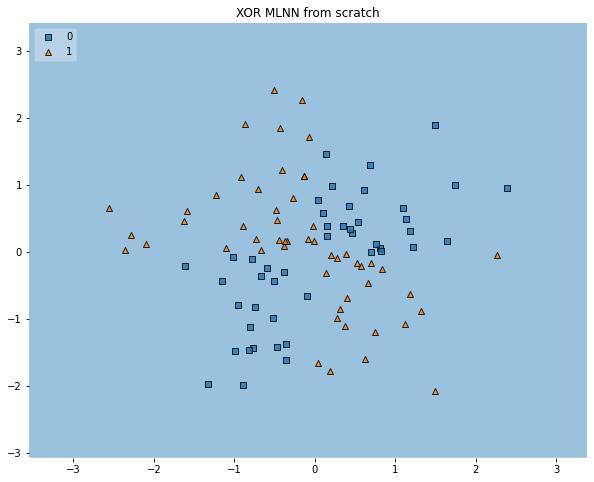

In [57]:
# visualization

fig = plt.figure(figsize=(10,8))
fig = plot_decision_regions(X=X_test, y=y_test, clf=model, legend=2)
plt.title("XOR MLNN from scratch")
plt.show()